# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pymaceuticals_data = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_pymaceuticals_data
combined_pymaceuticals_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = mouse_metadata['Mouse ID'].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicates = combined_pymaceuticals_data.loc[combined_pymaceuticals_data.duplicated(subset= ['Mouse ID', 'Timepoint',])]
mice_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_clean_df = combined_pymaceuticals_data[combined_pymaceuticals_data['Mouse ID'].isin(mice_duplicates)==False]
pymaceuticals_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = pymaceuticals_clean_df["Mouse ID"].nunique()
num_mice_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
reg_mean = pymaceuticals_clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
reg_mean 

reg_med = pymaceuticals_clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
reg_med

reg_var = pymaceuticals_clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
reg_var

reg_std = pymaceuticals_clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
reg_std

reg_SEM = pymaceuticals_clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
reg_SEM
# Assemble the resulting series into a single summary DataFrame.

summary_statistics_table = pd.DataFrame({"Mean Tumor Volume":reg_mean, 
                            "Median Tumor Volume":reg_med, 
                           "Tumor Volume Variance":reg_var, 
                           "Tumor Volume Std. Dev.":reg_std, 
                           "Tumor Volume Std. Err.":reg_SEM})
summary_statistics_table.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [ ]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_table_agg = pymaceuticals_clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['reg_mean', 'reg_med', 'reg_var', 'reg_std', 'reg_SEM'])
summary_statistics_table_agg
# single_groupby = pymaceuticals_clean_df.groupby('Drug Regimen')
# summary_statistics_table_agg = single_groupby.agg(['reg_mean', 'reg_med', 'reg_var', 'reg_std', 'reg_SEM'])["Tumour Volume (mm3)"]
# summary_statistics_table_agg


## Bar and Pie Charts

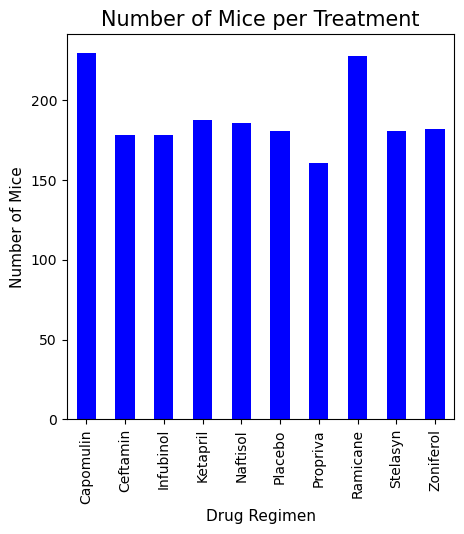

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_num_time_mice_per_drug = combined_pymaceuticals_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
bar_plot = total_num_time_mice_per_drug.plot.bar(figsize=(5,5), color='b',fontsize = 10)
plt.title("Number of Mice per Treatment",fontsize = 15)
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice",fontsize = 11)

plt.show()

total_num_time_mice_per_drug


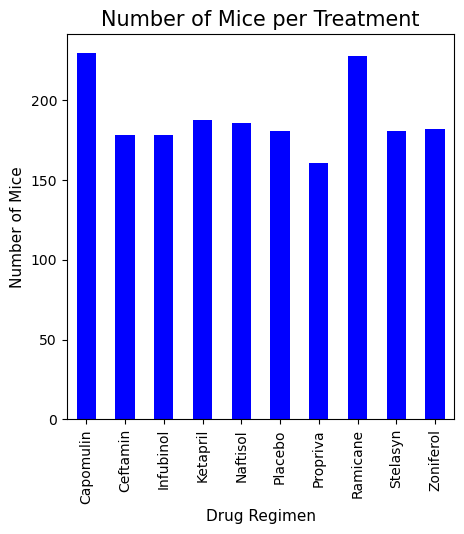

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_num_time_mice_per_drug_2 = combined_pymaceuticals_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
bar_plot = total_num_time_mice_per_drug.plot.bar(figsize=(5,5), color='b',fontsize = 10)
plt.title("Number of Mice per Treatment",fontsize = 15)
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice",fontsize = 11)

plt.show()

total_num_time_mice_per_drug_2


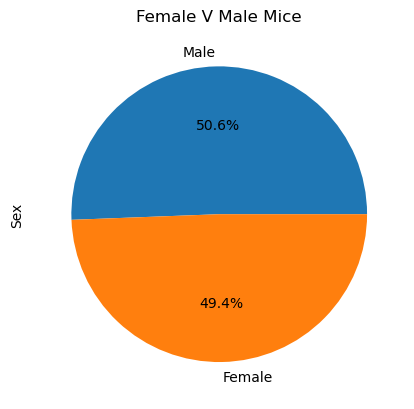

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = pymaceuticals_clean_df["Sex"].value_counts()
plt.title("Female V Male Mice")
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

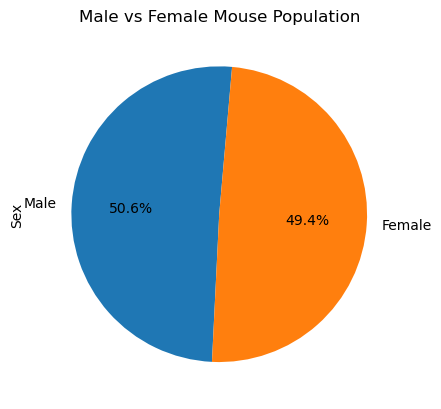

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%", startangle=85)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse on = ["Mouse ID","Timepoint"])
greatest_time = combined_pymaceuticals_data.groupby("Mouse ID")
greatest_time = greatest_time["Timepoint"].max()
greatest_time_df = pd.DataFrame(greatest_time) 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_tumor_volume_data_df = pd.merge(greatest_time_df, combined_pymaceuticals_data)
combined_tumor_volume_data_df.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_volume_capomulin = []
tumor_volume_ramicane = []
tumor_volume_infubinol = []
tumor_volume_ceftamin = []
    

In [101]:
#for loops
for i in range(len(combined_tumor_volume_data_df)-1):
    if combined_tumor_volume_data_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_volume_capomulin.append(combined_tumor_volume_data_df.loc[i, "Tumor Volume (mm3)"])
    if combined_tumor_volume_data_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_volume_ramicane.append(combined_tumor_volume_data_df.loc[i, "Tumor Volume (mm3)"])
    if combined_tumor_volume_data_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_volume_infubinol.append(combined_tumor_volume_data_df.loc[i, "Tumor Volume (mm3)"])
    if combined_tumor_volume_data_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_volume_ceftamin.append(combined_tumor_volume_data_df.loc[i, "Tumor Volume (mm3)"])

In [103]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#Locate the rows which contain mice on each drug and get the tumor volumes
# add subset  
treatments_list = [tumor_volume_capomulin, tumor_volume_ramicane, tumor_volume_infubinol, tumor_volume_ceftamin]
for i in range(len(treatments_list)):
    quartiles = pd.Series(treatments_list[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{tumor_treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)



Capomulin:
The lower quartile of tumor volume is: 35.4626906675.
The upper quartile of tumor volume is: 43.22567119.
The interquartile range of tumor volume is: 7.762980522500001.
The median of tumor volume is: 38.98287774.

Ramicane:
The lower quartile of tumor volume is: 33.56240217.
The upper quartile of tumor volume is: 43.0475426.
The interquartile range of tumor volume is: 9.485140430000001.
The median of tumor volume is: 38.25972497.

Infubinol:
The lower quartile of tumor volume is: 49.38557373.
The upper quartile of tumor volume is: 64.13872489.
The interquartile range of tumor volume is: 14.753151160000009.
The median of tumor volume is: 56.52332726.

Ceftamin:
The lower quartile of tumor volume is: 49.40687901.
The upper quartile of tumor volume is: 63.46954946.
The interquartile range of tumor volume is: 14.062670450000006.
The median of tumor volume is: 59.20566876.


In [ ]:
# Determine outliers using upper and lower bounds


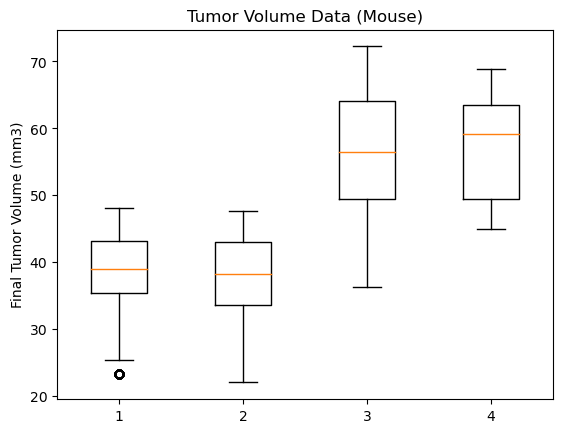

In [98]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# tumor_bxplt = plt.subplots()
# fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.boxplot(treatments_list)
plt.title('Tumor Volume Data (Mouse)')
plt.xlabel
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


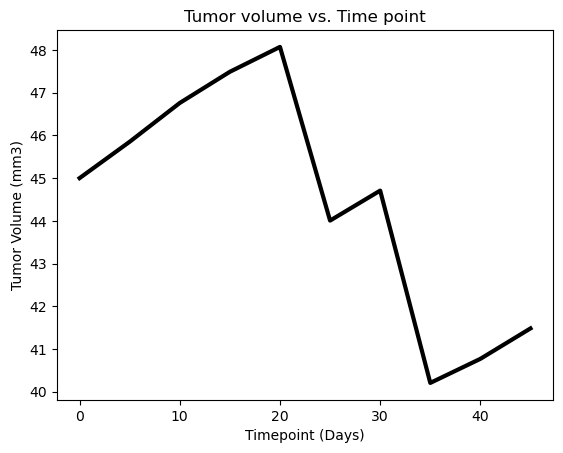

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_volume_v_t_p = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
tumsize = tumor_volume_v_t_p["Tumor Volume (mm3)"]
x_axis = tumor_volume_v_t_p["Timepoint"]
tumor_volume_v_t_p
fig1, ax1 = plt.subplots()
plt.title('Tumor volume vs. Time point')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, tumsize,linewidth=3,color="black", label="Fahreneit")
tumor_volume_v_t_p.head()

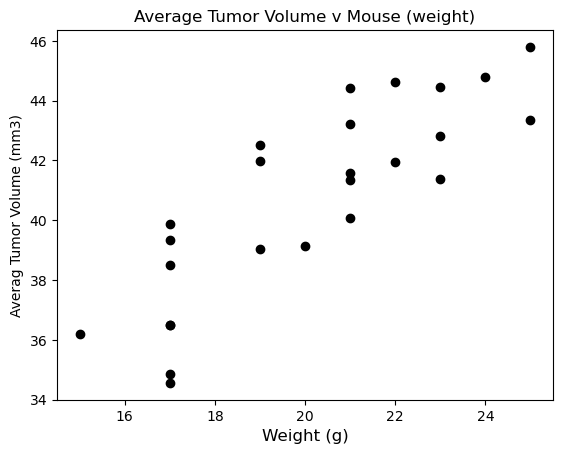

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tum_vol_v_cap_reg =Capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots()
plt.scatter(avg_tum_vol_v_cap_reg['Weight (g)'],avg_tum_vol_v_cap_reg['Tumor Volume (mm3)'], color="black")
plt.title('Average Tumor Volume v Mouse (weight)')
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)')
marker_size=12


## Correlation and Regression

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Define x and y values
value_x = avg_tum_vol_v_cap_reg ["Weight (g)"]
value_y = avg_tum_vol_v_cap_reg ["Tumor Volume (mm3)"]

#Correlation Coefficient 
correlation_coF = round(st.pearsonr(value_x, value_y)[0],2)
correlation_coF
print("The Correlation between Mouse Weight and Average Tumor Volume is:")
print(correlation_coF)


The Correlation between Mouse Weight and Average Tumor Volume is:
0.84


In [66]:
#linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(value_x, value_y)
regression_model = value_x * slope + intercept
line_of_best_fit = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


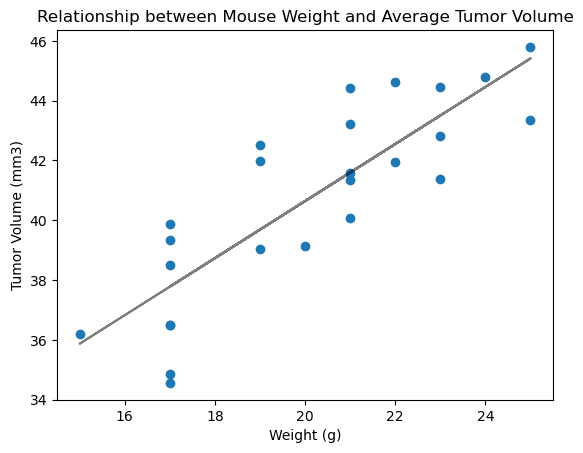

In [67]:
#Plotting the Graph
plt.scatter(value_x,value_y)
plt.plot(value_x, regression_model, color= 'black', alpha = 0.5)
plt.title("Relationship between Mouse Weight and Average Tumor Volume", fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()